In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree


In [30]:
# data1=pd.read_csv('/home/jitendra/Desktop/ml/clustering.csv')
# data1.head()

In [31]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# df.shape

In [41]:
# df.isnull().any()

In [37]:
# sns.pairplot(data=df,hue='species')

In [39]:
# sns.heatmap(df.corr())

In [47]:
features=['sepal_length','sepal_width','petal_length','petal_width']

In [49]:
X=df[features]

In [50]:
target=df['species']

In [55]:
le=LabelEncoder()
target=le.fit_transform(target)
# target

In [57]:
y=target

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.2)

In [64]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [72]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)
# print("Decision Tree Created")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [79]:
y_predicted=dtree.predict(X_test)
# print(X_test)

In [74]:
print(y_predicted)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


In [77]:
print("Classification report - \n", classification_report(y_test,y_predicted))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Accuracy Score: 0.9666666666666667')

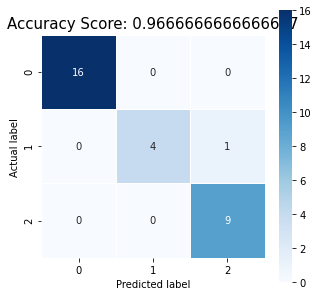

In [82]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

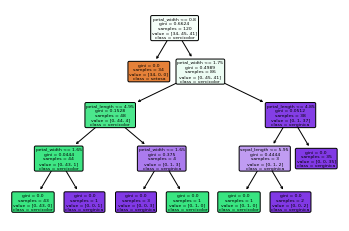

In [84]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)